#BigClam for community detection


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing relevent packages
import os
import shutil
import sys
from operator import add
import itertools
import numpy as np
import networkx as nx
import collections
import random
from sklearn.metrics import recall_score, precision_score
import time as time
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker

font = {'size'   : 14}    
plt.rc('font', **font)

import matplotlib as mpl


In [ ]:
path_graph = "/content/drive/MyDrive/Project-5/YouTube.edgelist"

G = nx.read_edgelist(path_graph, create_using= nx.Graph())

# Print the number of nodes and edges in the graph here (1 Point)
print("The total number of nodes in the graph is: " + str(len(G)))
print("The total number of edges in the graph is: " + str(G.number_of_edges()))

n = len(G)
c = 29

The total number of nodes in the graph is: 7675
The total number of edges in the graph is: 35622


In [ ]:
#computing intital F matrix for 20percent_seed_communities

given_list = []

given_data = open('/content/drive/MyDrive/Project-5/20percent_seed_communities.txt', 'r') 
  
count = 0
for line in given_data:
  nodes = line.strip().split(" ")
  given_list.append(np.array([int(i) for i in nodes]))
  count = count + 1

given_data.close()
print(len(given_list))
F_20 = np.zeros((n,c))
community_id = 0

# assign Fuc = 1 for given communities
for community in given_list:
  for node in community:
    F_20[node,community_id] = 1.0
  community_id += 1

K = np.zeros(c)
start = time.time()

# iterate ove all nodes and assign the neighours of that node
# that is locally minimal to the community
for i in range(n):
  if i%100 == 0:
    print("Node: ", i)
  for j in range(c):
    C = np.copy(given_list[j])
    
    neighbor_indices = [] 
    neighbor_indices.append(i)
    for k in G.neighbors(str(i)):
      C = np.append(C,int(k))
      neighbor_indices.append(int(k))
    
    virtual_community = set([str(k) for k in C])

    # compute the condictance after adding a node and ite neighbors to community c
    K[j] = nx.conductance(G, virtual_community)

  arg_min = np.argmin(K) # locally minimal community 

  F_20[neighbor_indices,arg_min] = 1.0

print("Execution time:", time.time() - start)

29
Node:  0
Node:  100
Node:  200
Node:  300
Node:  400
Node:  500
Node:  600
Node:  700
Node:  800
Node:  900
Node:  1000
Node:  1100
Node:  1200
Node:  1300
Node:  1400
Node:  1500
Node:  1600
Node:  1700
Node:  1800
Node:  1900
Node:  2000
Node:  2100
Node:  2200
Node:  2300
Node:  2400
Node:  2500
Node:  2600
Node:  2700
Node:  2800
Node:  2900
Node:  3000
Node:  3100
Node:  3200
Node:  3300
Node:  3400
Node:  3500
Node:  3600
Node:  3700
Node:  3800
Node:  3900
Node:  4000
Node:  4100
Node:  4200
Node:  4300
Node:  4400
Node:  4500
Node:  4600
Node:  4700
Node:  4800
Node:  4900
Node:  5000
Node:  5100
Node:  5200
Node:  5300
Node:  5400
Node:  5500
Node:  5600
Node:  5700
Node:  5800
Node:  5900
Node:  6000
Node:  6100
Node:  6200
Node:  6300
Node:  6400
Node:  6500
Node:  6600
Node:  6700
Node:  6800
Node:  6900
Node:  7000
Node:  7100
Node:  7200
Node:  7300
Node:  7400
Node:  7500
Node:  7600
Execution time: 1799.5508465766907


In [ ]:
print(np.sum(F_20))

18666.0


In [ ]:
#computing intital F matrix for F_neighborhood_seeds

given_list = []

given_data = open('/content/drive/MyDrive/Project-5/neighborhood_seeds.txt', 'r') 
  
count = 0
for line in given_data:
  nodes = line.strip().split(" ")
  given_list.append(np.array([int(i) for i in nodes]))
  count = count + 1

given_data.close()
print(len(given_list))
F_n = np.zeros((n,c))
community_id = 0

# assign Fuc = 1 for given communities
for community in given_list:
  for node in community:
    F_n[node,community_id] = 1.0
  community_id += 1

K = np.zeros(c)
start = time.time()

# iterate ove all nodes and assign the neighours of that node
# that is locally minimal to the community
for i in range(n):
  if i%100 == 0:
    print("Node: ", i)
  for j in range(c):
    C = np.copy(given_list[j])
    
    neighbor_indices = [] 
    neighbor_indices.append(i)
    for k in G.neighbors(str(i)):
      C = np.append(C,int(k))
      neighbor_indices.append(int(k))
    
    virtual_community = set([str(k) for k in C])

    # compute the condictance after adding a node and ite neighbors to community c
    K[j] = nx.conductance(G, virtual_community)

  arg_min = np.argmin(K) # locally minimal community 

  F_n[neighbor_indices,arg_min] = 1.0

print("Execution time:", time.time() - start)

29
Node:  0
Node:  100
Node:  200
Node:  300
Node:  400
Node:  500
Node:  600
Node:  700
Node:  800
Node:  900
Node:  1000
Node:  1100
Node:  1200
Node:  1300
Node:  1400
Node:  1500
Node:  1600
Node:  1700
Node:  1800
Node:  1900
Node:  2000
Node:  2100
Node:  2200
Node:  2300
Node:  2400
Node:  2500
Node:  2600
Node:  2700
Node:  2800
Node:  2900
Node:  3000
Node:  3100
Node:  3200
Node:  3300
Node:  3400
Node:  3500
Node:  3600
Node:  3700
Node:  3800
Node:  3900
Node:  4000
Node:  4100
Node:  4200
Node:  4300
Node:  4400
Node:  4500
Node:  4600
Node:  4700
Node:  4800
Node:  4900
Node:  5000
Node:  5100
Node:  5200
Node:  5300
Node:  5400
Node:  5500
Node:  5600
Node:  5700
Node:  5800
Node:  5900
Node:  6000
Node:  6100
Node:  6200
Node:  6300
Node:  6400
Node:  6500
Node:  6600
Node:  6700
Node:  6800
Node:  6900
Node:  7000
Node:  7100
Node:  7200
Node:  7300
Node:  7400
Node:  7500
Node:  7600
Execution time: 1705.4624516963959


In [ ]:
print(np.sum(F_n))

14861.0


In [ ]:
F_random = np.zeros((n,c))

for i in range(n):
  r1 = random.randint(1,5)
  for j in range(r1):
    r2 = random.randint(0,28)
    F_random[i,r2] = 1.0

In [ ]:
print(np.sum(F_random))

21996.0


In [ ]:
print('Total nodes assigned to the commuities 20 percent seed initilization : ', np.sum(F_20))
print('Total nodes assigned to the commuities Neighbor seed initilization : ', np.sum(F_n))
print('Total nodes assigned to the commuities Random initilization : ', np.sum(F_random))

Total nodes assigned to the commuities 20 percent seed initilization :  18666.0
Total nodes assigned to the commuities Neighbor seed initilization :  14861.0
Total nodes assigned to the commuities Random initilization :  21996.0


In [ ]:
#gradinet computation
def gradient_update(G,F,n,c,n_iters,lr):
  update_value = np.zeros(n_iters)
  
  for k in range(n_iters):
    # compute the sume of all nodes at the begining
    initial_sum = np.sum(F,axis=0)

    # iterate for each row of the column F
    for i in range(n):
      fu = np.copy(F[i,:])
      first_term = np.zeros(c)
      neighours_sum = np.zeros(c)

      # iterate over all neighbors of node u
      for j in G.neighbors(str(i)):
        int_j = int(j)
        fv = np.copy(F[int_j,:])

        product = np.sum(fu*fv) # FuFvT

        if product == 0:
          first_term = first_term + fv*0.0
        else:
          first_term = first_term + fv*(np.exp(-product)/(1.0 - np.exp(-product)))
        neighours_sum = neighours_sum + fv
      
      second_term = initial_sum - fu - neighours_sum

      # gradient computation
      gradient = first_term - second_term

      # old value of F for ith row
      fold = np.copy(F[i,:])

      # update ith row of F
      F[i,:] = F[i,:] + lr*gradient      
      F[i,:] = np.where(F[i,:]<0, 0.00001, F[i,:])

      # store the maximum value of change in F amongst all nodes
      if np.linalg.norm(fold - F[i,:]) > update_value[k]:
        update_value[k] = np.linalg.norm(fold - F[i,:])

    if k%50 == 0:
      print("Loop: " + str(k))

  return F, update_value


In [ ]:
# Note: Here the learning rate has not been used as suggested 0.001 instead 0.0001 has been used
# since with 0.001 learning rate the solution was going out of bound after 2nd iteration itself
n_iters = 300
lr = 0.0001

print("For 20_percent_seed: ")
F_true_seed_optimized, update_value_true_seed = gradient_update(G,F_20,n,c,n_iters,lr)
print("For neighborhood_seed: ")
F_neighbor_seed_optimized, update_value_neighbor_seed = gradient_update(G,F_n,n,c,n_iters,lr)
print("For random_seed: ")
F_random_optimized, update_value_random = gradient_update(G,F_random,n,c,n_iters,lr)

For 20_percent_seed: 
Loop: 0
Loop: 50
Loop: 100
Loop: 150
Loop: 200
Loop: 250
For neighborhood_seed: 
Loop: 0
Loop: 50
Loop: 100
Loop: 150
Loop: 200
Loop: 250
For random_seed: 
Loop: 0
Loop: 50
Loop: 100
Loop: 150
Loop: 200
Loop: 250


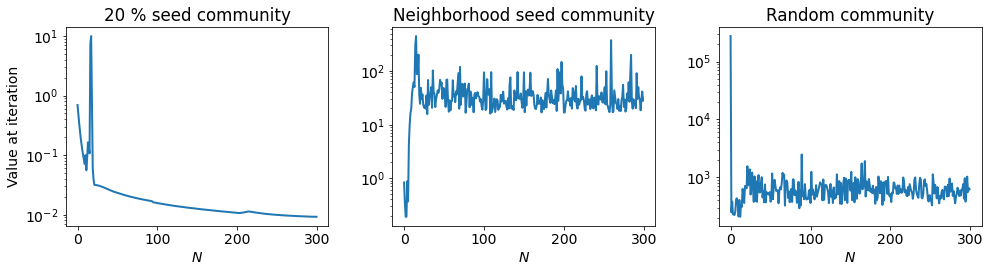

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

axs = ax.flat

axs[0].semilogy(update_value_true_seed, lw=2, ms=8, mew=2, fillstyle='none',  label='Iteration update')
axs[1].semilogy(update_value_neighbor_seed, lw=2, ms=8, mew=2, fillstyle='none',  label='Iteration update')
axs[2].semilogy(update_value_random, lw=2, ms=8, mew=2, fillstyle='none',  label='Iteration update')

for i in range(3):
  axs[i].set_xlabel('$N$')
  if i == 0:
    axs[i].set_ylabel('Value at iteration')

axs[0].set_title('20 % seed community')
axs[1].set_title('Neighborhood seed community')
axs[2].set_title('Random community')

fig.tight_layout()
plt.show()

In [ ]:
eps = 1.0e-8
delta = np.sqrt(-np.log(1.0 - eps))
print("Delta values: " + str(delta))

Delta values: 0.00010000000050123797


In [ ]:
ground_truth_community_array = []

# change this path
file1 = open('/content/drive/MyDrive/Project-5/groundtruth_communities.txt', 'r') 
Lines = file1.readlines() 
  
count = 0
for line in Lines: 
    ground_truth_community_array.append(np.array([int(i) for i in line.strip().split(" ")]))
    count = count + 1

file1.close()

y_true = np.zeros((n,c))
counter = 0
for community in ground_truth_community_array:
  for node in community:
    y_true[node, counter] = 1.0
  counter = counter + 1

In [ ]:
# data = np.load('/content/drive/MyDrive/Coursework/CS 5683_Big_Data/Project-5/initial_F_all_nodes.npz')
# F = data['F']

y_pred_true_seed = np.zeros((n,c))
y_pred_neighbor_seed = np.zeros((n,c))
y_pred_random = np.zeros((n,c))

for i in range(n):
  pred_community = np.where(F_true_seed_optimized[i,:] > delta)
  for j in pred_community[0]:
    y_pred_true_seed[i,j] = 1.0

  pred_community = np.where(F_n[i,:] > delta)
  for j in pred_community[0]:
    y_pred_neighbor_seed[i,j] = 1.0
  
  pred_community = np.where(F_random[i,:] > delta)
  for j in pred_community[0]:
    y_pred_random[i,j] = 1.0

In [ ]:
#Storing communities for 20_percent_seeds
file_ = open('20_pecent_seed_communities.txt', 'a')

all_communities = []
for i in range (c):
  nodes_in_community = []
  for j in range (n):
    if y_pred_true_seed[j][i] == 1.0:
      nodes_in_community.append(j)
  all_communities.append(nodes_in_community)
  s = str(nodes_in_community) + "\n"
  file_.write(s)

file_.close()

In [ ]:
#Storing communities for Neighborhood_seeds
file_ = open('Neighborhood_seed_communities.txt', 'a')

for i in range (c):
  nodes_in_community = []
  for j in range (n):
    if y_pred_neighbor_seed[j][i] == 1.0:
      nodes_in_community.append(j)
  s = str(nodes_in_community) + "\n"
  file_.write(s)

file_.close()

In [ ]:
#Storing communities for Random_seeds
file_ = open('Random_seed_communities.txt', 'a')

for i in range (c):
  nodes_in_community = []
  for j in range (n):
    if y_pred_random[j][i] == 1.0:
      nodes_in_community.append(j)
  s = str(nodes_in_community) + "\n"
  file_.write(s)

file_.close()

In [ ]:
#Computing recall, precision and f1 score for all initialization methods
recall_true_seed = 0.0
recall_neighbor_seed = 0.0
recall_random = 0.0

precision_true_seed = 0.0
precision_neighbor_seed = 0.0
precision_random = 0.0

f_true_seed = 0.0
f_neighbor_seed = 0.0
f_random_seed = 0.0

for j in range(c):
  array = np.zeros(c)
  for i in range(c):
    rc = recall_score(y_true[:,j], y_pred_true_seed[:,i])
    array[i] = rc
  
  visited = set()
  arg_max = np.argmax(array)
  while arg_max in visited:
    array[arg_max] = -1
    arg_max = np.argmax(array)
  
  visited.add(arg_max)
  recall_true_seed += recall_score(y_true[:,j], y_pred_true_seed[:,arg_max])
  precision_true_seed += precision_score(y_true[:,j], y_pred_true_seed[:,arg_max])
  
  array = np.zeros(c)
  for i in range(c):
    rc = recall_score(y_true[:,j], y_pred_neighbor_seed[:,i])
    array[i] = rc
  
  visited = set()
  arg_max = np.argmax(array)
  while arg_max in visited:
    array[arg_max] = -1
    arg_max = np.argmax(array)
  
  visited.add(arg_max)
  recall_neighbor_seed += recall_score(y_true[:,j], y_pred_neighbor_seed[:,arg_max])
  precision_neighbor_seed += precision_score(y_true[:,j], y_pred_neighbor_seed[:,arg_max])

  array = np.zeros(c)
  for i in range(c):
    rc = recall_score(y_true[:,j], y_pred_random[:,i])
    array[i] = rc
  
  visited = set()
  arg_max = np.argmax(array)
  while arg_max in visited:
    array[arg_max] = -1
    arg_max = np.argmax(array)
  
  visited.add(arg_max)
  recall_random += recall_score(y_true[:,j], y_pred_random[:,arg_max])
  precision_random += precision_score(y_true[:,j], y_pred_random[:,arg_max])

recall_true_seed = recall_true_seed/c
recall_neighbor_seed = recall_neighbor_seed/c
recall_random = recall_random/c

precision_true_seed /= c
precision_neighbor_seed /= c
precision_random /= c

f_true_seed = 2*(precision_true_seed*recall_true_seed)/(precision_true_seed+recall_true_seed)
f_neighbor_seed = 2*(precision_neighbor_seed*recall_neighbor_seed)/(precision_neighbor_seed+recall_neighbor_seed)
f_random_seed = 2*(precision_random*recall_random)/(precision_random+recall_random)

print('20 % seed community recall: ', np.round(recall_true_seed, 4))
print('Neighborhood seed community recall: ', np.round(recall_neighbor_seed, 4))
print('Random community recall: ', np.round(recall_random, 4))

print("\n")

print('20 % seed community precision: ', np.round(precision_true_seed, 4))
print('Neighborhood seed community precision: ', np.round(precision_neighbor_seed, 4))
print('Random community precision: ', np.round(precision_random, 4))

print("\n")

print('20 % seed community f1: ', np.round(f_true_seed, 4))
print('Neighborhood seed community f1: ', np.round(f_neighbor_seed, 4))
print('Random community f1:', np.round(f_random_seed, 4))

20 % seed community recall:  0.8669
Neighborhood seed community recall:  0.6869
Random community recall:  0.7079


20 % seed community precision:  0.3553
Neighborhood seed community precision:  0.1632
Random community precision:  0.1367


20 % seed community f1:  0.5041
Neighborhood seed community f1:  0.2638
Random community f1: 0.2291


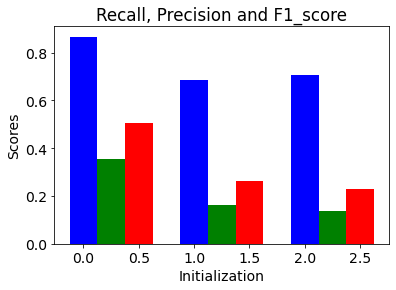

In [ ]:
#Plot for Recall(blue), precision(green) and f1 score(red) for each kind of initialization
#The comparison clearly depicts the importance of initializing F matrix at appropirate values
#The results are much better when we use 20 percent seed of the ground truth community for the initialization than the other two initialization method

import numpy as np
import matplotlib.pyplot as plt

recalls = [recall_true_seed, recall_neighbor_seed, recall_random]
precisions = [precision_true_seed, precision_neighbor_seed, precision_random]
fs = [f_true_seed, f_neighbor_seed, f_random_seed]

data = [recalls, precisions, fs]

plt.xlabel('Initialization')
plt.ylabel('Scores')
plt.title('Recall, Precision and F1_score')

X = np.arange(3)
plt.bar(X + 0.00, data[0], color = 'b', width = 0.25)
plt.bar(X + 0.25, data[1], color = 'g', width = 0.25)
plt.bar(X + 0.50, data[2], color = 'r', width = 0.25)

plt.show()

In [ ]:
import collections

nodes_total_communities = collections.defaultdict(int)
nodes_communities = collections.defaultdict(int)

for li in all_communities:
  for item in li:
    nodes_total_communities[item] += 1

for key, value in nodes_total_communities.items():
  nodes_communities[value] += 1

x_array = []
y_array = []
for key, value in nodes_communities.items():
  x_array.append(key)
  y_array.append(value)

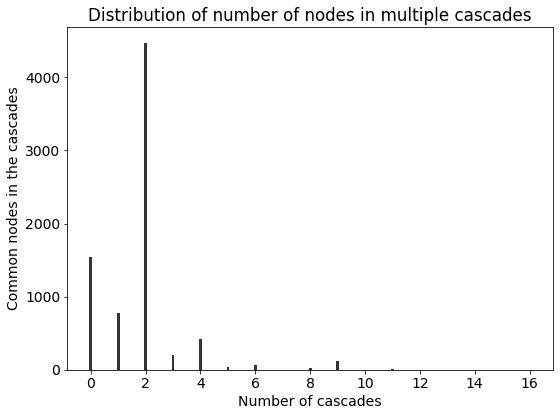

In [ ]:
names = x
values = y

x = np.arange(len(names))  # the label locations
width = 0.1  # the width of the bars

fig, axs = plt.subplots(1, 1, figsize=(8, 6), sharey=True)
axs.bar(names, values, width, color='k', alpha=0.8)
plt.title('Distribution of number of nodes in multiple cascades')
plt.xlabel('Number of cascades')
plt.ylabel('Common nodes in the cascades')
fig.tight_layout()
plt.show()